<a href="https://colab.research.google.com/github/sal0m/HSE_ML_hw2/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Ваш ответ здесь`



## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [2]:
import numpy as np
import sympy as sp

In [10]:
from sympy import *

In [3]:
x = sp.Symbol('x')

In [13]:
def f(x):
  return x * sin(5 * x) + 0.1 * x**2

In [14]:
df_x = sp.diff(f(x))
df_x

5*x*cos(5*x) + 0.2*x + sin(5*x)

In [19]:
# Функция и её производная
def f(x):
  return x * np.sin(5 * x) + 0.1 * x ** 2

def df(x):
    return 5 * x * np.cos(5 * x) + 0.2 * x + np.sin(5 * x)

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):
    x_curr = x0
    path = [x_curr]

    for i in range(max_iter):
      x_new = x_curr - eta * df(x_curr)
      path.append(x_new)

      if abs(x_new - x_curr) < tol:
        return x_curr, path

      x_curr = x_new

    return x, path

# Поиск экстремумов
def find_points(f, df, x0, eta=0.001, max_iter=1000, tol=1e-6):

    min_x, min_path = gradient_descent(f, df, x0, eta, max_iter, tol)
    min_val = f(min_x)

    max_x, max_path = gradient_descent(f, lambda x: -df(x), x0, eta, max_iter, tol)
    max_val = f(max_x)

    return {"minimum": (min_x, min_val, min_path), "maximum": (max_x, max_val, max_path)}

In [20]:
x0_values = [0, 0.5, 1]
for x0 in x0_values:
  result = find_points(f, df, x0)
  print(f"Стартовая точка: {x0}")
  print(f"Минимум: x = {result['minimum'][0]:.4f}, f(x) = {result['minimum'][1]:.4f}")
  print(f"Максимум: x = {result['maximum'][0]:.4f}, f(x) = {result['maximum'][1]:.4f}")
  print("-" * 40)

Стартовая точка: 0
Минимум: x = 0.0000, f(x) = 0.0000
Максимум: x = 0.0000, f(x) = 0.0000
----------------------------------------
Стартовая точка: 0.5
Минимум: x = 0.9751, f(x) = -0.8671
Максимум: x = 0.4119, f(x) = 0.3807
----------------------------------------
Стартовая точка: 1
Минимум: x = 0.9751, f(x) = -0.8671
Максимум: x = 1.6035, f(x) = 1.8392
----------------------------------------


In [21]:
import matplotlib.pyplot as plt

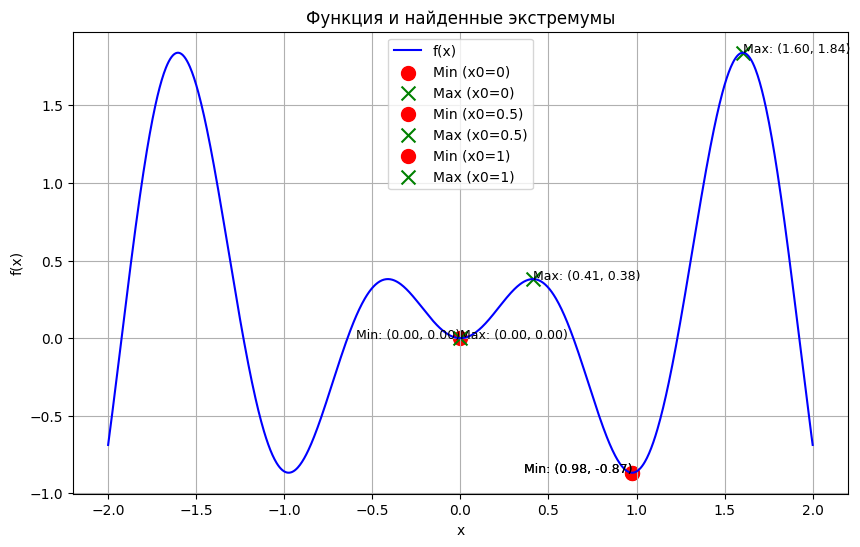

In [22]:
# Визуализация функции и экстремумов
def plot_function_and_extrema(f, df, x0_values, eta=0.001):
    x = np.linspace(-2, 2, 1000)  # диапазон для построения функции
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="f(x)", color="blue")

    # Находим и отображаем экстремумы для каждой стартовой точки
    for x0 in x0_values:
        result = find_points(f, df, x0, eta)
        min_x, min_val = result["minimum"][:2]
        max_x, max_val = result["maximum"][:2]

        # Отображение минимума
        plt.scatter(min_x, min_val, color="red", marker="o", s=100, label=f"Min (x0={x0})")
        plt.text(min_x, min_val, f"Min: ({min_x:.2f}, {min_val:.2f})", fontsize=9, ha='right')

        # Отображение максимума
        plt.scatter(max_x, max_val, color="green", marker="x", s=100, label=f"Max (x0={x0})")
        plt.text(max_x, max_val, f"Max: ({max_x:.2f}, {max_val:.2f})", fontsize=9, ha='left')

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Функция и найденные экстремумы")
    plt.legend()
    plt.grid(True)
    plt.show()

# Стартовые точки
x0_values = [0, 0.5, 1]

# Построение графика
plot_function_and_extrema(f, df, x0_values)

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [ ]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [ ]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    j = 0

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        j = random.randint(0, len(X)-1)

        params = params - 2./learning_rate * (X[j].T @ ((X[j] @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [ ]:
# your code here

your text here

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [ ]:
# your code here

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
def modified_grad_descent(X, y, learning_rate, iterations): # добавьте в аргументы также специфические для метода оптимизации гиперпараметры
    # your code here

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

`Ваш ответ здесь`

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)